<a href="https://colab.research.google.com/github/simplexityware/RL-book/blob/master/ReinforcementLearningBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/TikhonJelvis/RL-book/

In [ ]:
from abc import ABC, abstractmethod
from dataclasses import dataclass
import random
import statistics
from typing import Generic, TypeVar


A = TypeVar("A")


class Distribution(ABC, Generic[A]):
    @abstractmethod
    def sample(self) -> A:
        pass


class OldDie(Distribution):
    def __init__(self, sides):
        self.sides = sides

    def __repr__(self):
        return f"Die(sides={self.sides})"

    def __eq__(self, other):
        if isinstance(other, Die):
            return self.sides == other.sides

        return False

    def sample(self) -> int:
        return random.randint(1, self.sides)


six_sided = OldDie(6)


def roll_dice():
    return six_sided.sample() + six_sided.sample()


@dataclass(frozen=True)
class Coin(Distribution[str]):
    def sample(self):
        return "heads" if random.random() < 0.5 else "tails"


@dataclass(frozen=True)
class Die(Distribution):
    sides: int

    def sample(self):
        return random.randint(1, self.sides)


def expected_value(d: Distribution[float], n: int) -> float:
    return statistics.mean(d.sample() for _ in range(n))


expected_value(Die(6), 100)

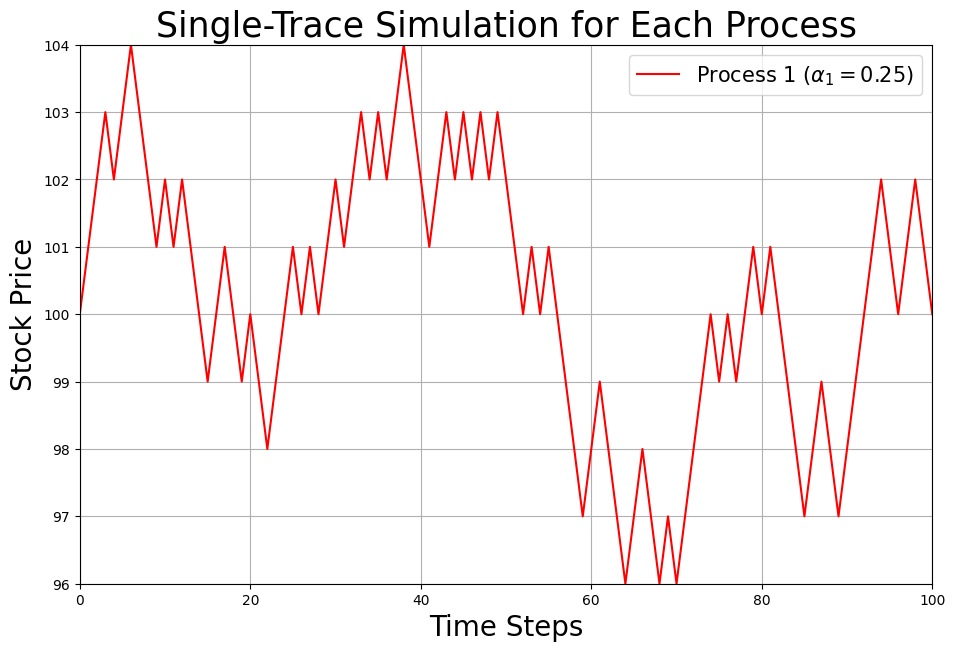

In [ ]:
import itertools
import numpy as np
from dataclasses import dataclass
from numpy.random import binomial
from typing import Callable
from typing import Optional, Mapping, Sequence, Tuple
from collections import Counter
from operator import itemgetter

def get_logistic_func(alpha: float) -> Callable[[float], float]:
    return lambda x: 1. / (1 + np.exp(-alpha * x))

@dataclass
class Process1:
    @dataclass
    class State:
        price: int

    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)

    def up_prob(self, state: State) -> float:
        return get_logistic_func(self.alpha1)(self.level_param - state.price)

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price=state.price + up_move * 2 - 1)

def simulation(process, start_state):
    state = start_state
    while True:
        yield state
        state = process.next_state(state)

def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process1(level_param=level_param, alpha1=alpha1)
    start_state = Process1.State(price=start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])



import matplotlib.pyplot as plt

def plot_list_of_curves(
    list_of_x_vals,
    list_of_y_vals,
    list_of_colors,
    list_of_curve_labels,
    x_label=None,
    y_label=None,
    title=None
):
    plt.figure(figsize=(11, 7))
    for i, x_vals in enumerate(list_of_x_vals):
        plt.plot(
            x_vals,
            list_of_y_vals[i],
            list_of_colors[i],
            label=list_of_curve_labels[i]
        )
    plt.axis((
        min(map(min, list_of_x_vals)),
        max(map(max, list_of_x_vals)),
        min(map(min, list_of_y_vals)),
        max(map(max, list_of_y_vals))
    ))
    if x_label is not None:
        plt.xlabel(x_label, fontsize=20)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=20)
    if title is not None:
        plt.title(title, fontsize=25)
    plt.grid(True)
    plt.legend(fontsize=15)
    plt.show()

def plot_single_trace_all_processes(
    process1_trace: np.ndarray,
) -> None:

  traces_len: int = len(process1_trace)

  plot_list_of_curves(
      [range(traces_len)] * 1,
      [process1_trace],
      ["r-"],
      [
          r"Process 1 ($\alpha_1=0.25$)",
      ],
      "Time Steps",
      "Stock Price",
      "Single-Trace Simulation for Each Process"
  )


start_price: int = 100
level_param: int = 100
alpha1: float = 0.25
alpha2: float = 0.75
alpha3: float = 1.0
time_steps: int = 100
num_traces: int = 1000

process1_traces: np.ndarray = process1_price_traces(
    start_price=start_price,
    level_param=level_param,
    alpha1=alpha1,
    time_steps=time_steps,
    num_traces=num_traces
)

trace1 = process1_traces[0]
plot_single_trace_all_processes(trace1)


IndexError: list index out of range

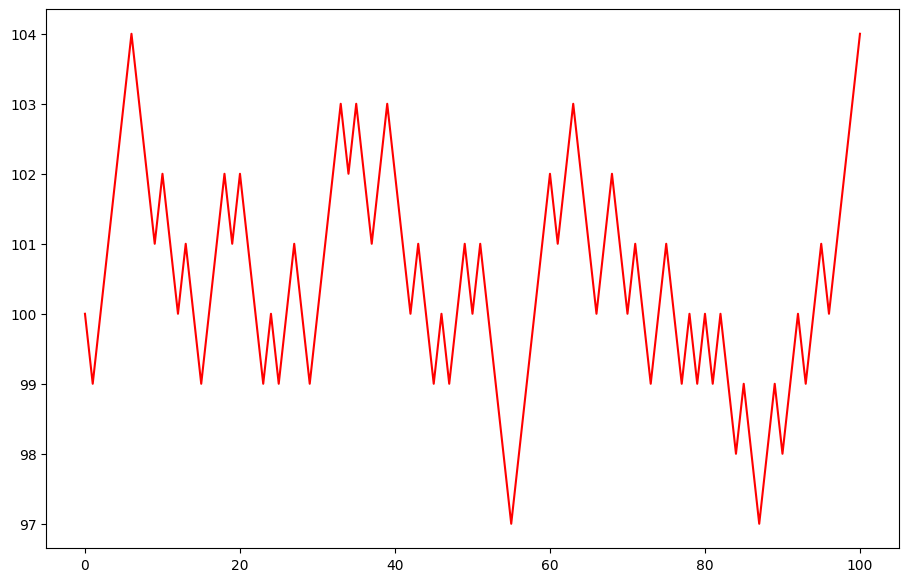

In [ ]:
import itertools
import numpy as np
from dataclasses import dataclass
from numpy.random import binomial
from typing import Callable
from typing import Optional, Mapping, Sequence, Tuple
from collections import Counter
from operator import itemgetter

def get_logistic_func(alpha: float) -> Callable[[float], float]:
    return lambda x: 1. / (1 + np.exp(-alpha * x))

@dataclass
class Process1:
    @dataclass
    class State:
        price: int

    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)

    def up_prob(self, state: State) -> float:
        return get_logistic_func(self.alpha1)(self.level_param - state.price)

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price=state.price + up_move * 2 - 1)

def simulation(process, start_state):
    state = start_state
    while True:
        yield state
        state = process.next_state(state)

def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process1(level_param=level_param, alpha1=alpha1)
    start_state = Process1.State(price=start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])


import matplotlib.pyplot as plt
import numpy as np


def plot_list_of_curves(
    list_of_x_vals,
    list_of_y_vals,
    list_of_colors,
    list_of_curve_labels,
    x_label=None,
    y_label=None,
    title=None
):
    plt.figure(figsize=(11, 7))
    for i, x_vals in enumerate(list_of_x_vals):
        plt.plot(
            x_vals,
            list_of_y_vals[i],
            list_of_colors[i],
            label=list_of_curve_labels[i]
        )
    plt.axis((
        min(map(min, list_of_x_vals)),
        max(map(max, list_of_x_vals)),
        min(map(min, list_of_y_vals)),
        max(map(max, list_of_y_vals))
    ))
    if x_label is not None:
        plt.xlabel(x_label, fontsize=20)
    if y_label is not None:
        plt.ylabel(y_label, fontsize=20)
    if title is not None:
        plt.title(title, fontsize=25)
    plt.grid(True)
    plt.legend(fontsize=15)
    plt.show()

def plot_single_trace_all_processes(
    process1_trace: np.ndarray,
) -> None:

    traces_len: int = len(process1_trace)

    plot_list_of_curves(
        [range(traces_len)] * 1,
        [process1_trace],
        ["r-"],
        [
            r"Process 1 ($\alpha_1=0.25$)",
        ],
        "Time Steps",
        "Stock Price",
        "Single-Trace Simulation for Each Process"
    )


def get_terminal_histogram(
    price_traces: np.ndarray
) -> Tuple[Sequence[int], Sequence[int]]:
    pairs: Sequence[Tuple[int, int]] = sorted(
        list(Counter(price_traces[:, -1]).items()),
        key=itemgetter(0)
    )
    return [x for x, _ in pairs], [y for _, y in pairs]


def plot_distribution_at_time_all_processes(
    process1_traces: np.ndarray,
    process2_traces: np.ndarray,
    process3_traces: np.ndarray
) -> None:

    num_traces: int = len(process1_traces)
    time_steps: int = len(process1_traces[0]) - 1

    x1, y1 = get_terminal_histogram(process1_traces)
    x2, y2 = get_terminal_histogram(process2_traces)
    x3, y3 = get_terminal_histogram(process3_traces)

    plot_list_of_curves(
        [x1, x2, x3],
        [y1, y2, y3],
        ["r-", "b--", "g-."],
        [
            r"Process 1 ($\alpha_1=0.25$)",
            r"Process 2 ($\alpha_2=0.75$)",
            r"Process 3 ($\alpha_3=1.0$)"
        ],
        "Terminal Stock Price",
        "Counts",
        f"Terminal Price Counts (T={time_steps:d}, Traces={num_traces:d})"
    )

start_price: int = 100
level_param: int = 100
alpha1: float = 0.25
alpha2: float = 0.75
alpha3: float = 1.0
time_steps: int = 100
num_traces: int = 1000

process1_traces: np.ndarray = process1_price_traces(
    start_price=start_price,
    level_param=level_param,
    alpha1=alpha1,
    time_steps=time_steps,
    num_traces=num_traces
)

trace1 = process1_traces[0]

plot_single_trace_all_processes(trace1)

plot_distribution_at_time_all_processes(process1_traces)



In [ ]:




alpha = [2.0, 1.0, 0.5]
colors = ["r-", "b--", "g-."]
labels = [(r"$\alpha$ = %.1f" % a) for a in alpha]
logistics = [get_logistic_func(a) for a in alpha]
x_vals = np.arange(-3.0, 3.01, 0.05)
y_vals = [f(x_vals) for f in logistics]
plot_list_of_curves(
    [x_vals] * len(logistics),
    y_vals,
    colors,
    labels,
    title="Logistic Functions"
)